In [47]:

import pandas as pd
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
dataset = '/content/drive/MyDrive/PCDML/Amazon_Unlocked_Mobile.csv'
data = pd.read_csv(dataset)
data

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


In [50]:
data.shape


(413840, 6)

In [51]:
# ambil hanya pada brand samsung
data = data.loc[data['Brand Name'] == 'Samsung', 'Brand Name':'Reviews']
# ambil hanya 1000 data
data = data.iloc[0:1000]
# ambil hanya feature Reviews dan Rating
data = data[['Reviews', 'Rating']]
# hapus data mis
data.dropna(inplace=True)

In [ ]:
data

,Reviews,Rating
0,I feel so LUCKY to have found this used (phone...,5
1,"nice phone, nice up grade from my pantach revu...",4
2,Very pleased,5
3,It works good but it goes slow sometimes but i...,4
4,Great phone to replace my lost phone. The only...,4
...,...,...
184881,Advertised as compatible with Verizon network....,1
184882,Not a user friendly at all. The gal at the sto...,1
184883,As expected!,4
184884,Bought this unlocked phone to take overseas. O...,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 184885
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  999 non-null    object
 1   Rating   999 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 23.4+ KB


In [ ]:
# iris_df.isnull().values.any()
data.isna().values.any() # mendeteksi keberadaan nilai kosong

False

In [ ]:
# iris_df[iris_df.duplicated(keep=False)] # tampilkan seluruh baris dengan duplikasi
data[data.duplicated()] # tampilkan hanya baris duplikasi sekunder

,Reviews,Rating
182883,excelente,5
182896,Great phone,5
182938,Good,5
183032,Nice,5
183044,Very good,5
...,...,...
183554,Excellent choice of cellphone.,5
183555,Great price for a great phone. Even though it ...,5
183556,Outstanding phone at a great price!,5
184779,As expected,5


In [ ]:
data.duplicated().value_counts() # hitung jumlah duplikasi data

False    859
True     140
dtype: int64

In [ ]:
data.drop_duplicates(inplace=True) # menghapus duplikasi data
data.shape


(859, 2)

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [58]:
lemma = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def CleanReview(txt):
  txt = re.sub(r'http\S+', ' ', txt)                                                 # hapus url
  txt = re.sub('[^a-zA-Z]','  ', txt)                                                # hapus teks tidak relevan (karakter selain a-z)
  txt = str(txt).lower()                                                             # jadikan huruf kecil semua
  txt = word_tokenize(txt)                                                           # tokenize
  txt = [item for item in txt if item not in stop_words]                             # hapus stop words ('saya' 'aku' 'kamu' dll)
  txt = [lemma.lemmatize(word=w,pos='v') for w in txt]                               # lemmatization : mengembalikan ke bentuk dasar kata
  txt = [i for i in txt if len(i) > 2]                                               # hapus kata yang kurang dari dua huruf/karakter
  txt = ' '.join(txt)                                                                # penggabungan setiap token menjadi kalimat utuh
  return txt

data['CleanReview'] = data['Reviews'].apply(CleanReview)

In [59]:
data.head()

,Reviews,Rating,Label,CleanReview
0,I feel so LUCKY to have found this used (phone...,5,positif,feel lucky find use phone use hard phone line ...
1,"nice phone, nice up grade from my pantach revu...",4,positif,nice phone nice grade pantach revue clean set ...
2,Very pleased,5,positif,please
3,It works good but it goes slow sometimes but i...,4,positif,work good slow sometimes good phone love
4,Great phone to replace my lost phone. The only...,4,positif,great phone replace lose phone thing volume bu...


In [ ]:
data.describe()

,Rating
count,859.000000
mean,3.826542
std,1.540878
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
data.corr() # korelasi antar kolom

,Rating
Rating,1.0


In [30]:
# iris_df.isnull().values.any()
data.isna().values.any() # mendeteksi keberadaan nilai kosong

False

In [31]:
data.duplicated().value_counts() # hitung jumlah duplikasi data

False    859
dtype: int64

In [ ]:
import matplotlib.pyplot as plt # visualisasi data
import seaborn as sns # visualisasi data

# output dari visualisasi data akan diarahkan ke notebook
%matplotlib inline 

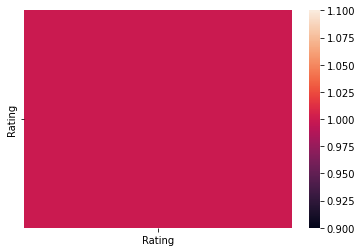

In [ ]:
sns.heatmap(data=data.corr())


In [ ]:
data['Reviews'].value_counts() # menghitung jumlah setiap species

Great                                                                                                                                                                                                            2
Excellent                                                                                                                                                                                                        2
The seller came through . Succeeded expectations                                                                                                                                                                 1
Great phone, does everything I need and more                                                                                                                                                                     1
My son loved his new phone.                                                                                                                                 

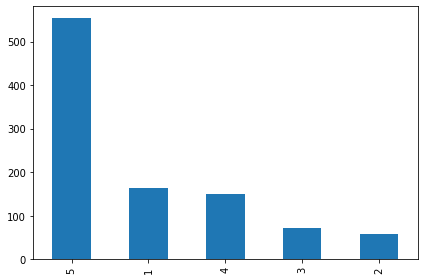

In [52]:
data['Rating'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

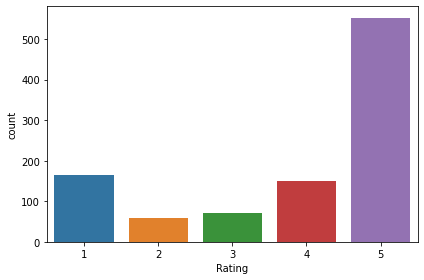

In [54]:
sns.countplot(data=data, x='Rating')
plt.tight_layout()
# sns.countplot?

In [55]:
from sklearn.model_selection import train_test_split # pembagi dataset menjadi training dan testing set
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report # evaluasi performa model

In [56]:
# melabelkan data menjadi 2 kategori
def pelabelan(rate):
  if rate < 3:
    return 'negatif'
  else:
    return 'positif'

data['Label'] = data['Rating'].apply(pelabelan)
data.head()

,Reviews,Rating,Label
0,I feel so LUCKY to have found this used (phone...,5,positif
1,"nice phone, nice up grade from my pantach revu...",4,positif
2,Very pleased,5,positif
3,It works good but it goes slow sometimes but i...,4,positif
4,Great phone to replace my lost phone. The only...,4,positif


In [60]:
# split x dan y
x = data['CleanReview']
y = data['Label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [61]:
y_test

182794    positif
183399    positif
183447    negatif
182964    positif
24        positif
           ...   
183232    positif
183380    positif
183227    negatif
183387    positif
182826    negatif
Name: Label, Length: 200, dtype: object

In [62]:
# perform count vectorizer
vectorizer = CountVectorizer()
vectorizer.fit(x_train)

CountVectorizer()

In [63]:
# x_train
x_train = vectorizer.transform(x_train)
x_test = vectorizer.transform(x_test)

In [64]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [65]:
for c in [0.01, 0.05, 0.25, 0.5, 0.75,  1]:
  svm = LinearSVC(C=c)
  svm.fit(x_train, y_train)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(x_test))))

Akurasi untuk c = 0.01: 0.82
Akurasi untuk c = 0.05: 0.855
Akurasi untuk c = 0.25: 0.845
Akurasi untuk c = 0.5: 0.835
Akurasi untuk c = 0.75: 0.83
Akurasi untuk c = 1: 0.84


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [66]:
svm = LinearSVC(C = 0.25)
svm.fit(x_train, y_train)

LinearSVC(C=0.25)

In [67]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(x_test)))

Accuracy score model final: 0.845 


In [68]:
y_pred = svm.predict(x_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(x_test, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

Accuracy of SVM classifier on test set: 0.84
[[ 24  21]
 [ 10 145]]
              precision    recall  f1-score   support

     negatif       0.71      0.53      0.61        45
     positif       0.87      0.94      0.90       155

    accuracy                           0.84       200
   macro avg       0.79      0.73      0.76       200
weighted avg       0.84      0.84      0.84       200



KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k) # konfigurasi algoritma
    model_knn.fit(x_train, y_train) # training model/classifier
    y_pred = model_knn.predict(x_test) # melakukan prediksi
    scores.append(accuracy_score(y_test, y_pred)) # evaluasi performa

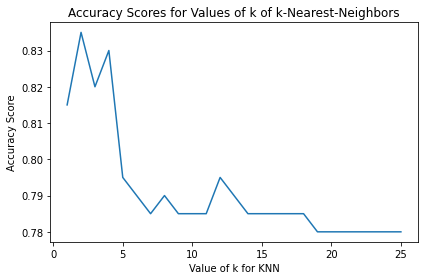

In [72]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.tight_layout()
plt.show()

In [73]:
model_knn = KNeighborsClassifier(n_neighbors=3) # konfigurasi algoritma
model_knn.fit(x_train,y_train) # training model/classifier
y_pred = model_knn.predict(x_test) # melakukan prediksi

In [74]:
print(accuracy_score(y_test, y_pred)) # evaluasi akurasi

0.82


In [76]:
print(classification_report(y_test, y_pred)) # evaluasi klasifikasi

              precision    recall  f1-score   support

     negatif       0.74      0.31      0.44        45
     positif       0.83      0.97      0.89       155

    accuracy                           0.82       200
   macro avg       0.78      0.64      0.67       200
weighted avg       0.81      0.82      0.79       200



LOGISTIC REGRESION

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
# model_logreg = LogisticRegression()
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(x_train,y_train)
y_pred = model_logreg.predict(x_test)

In [79]:
print(accuracy_score(y_test, y_pred))

0.85


In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     negatif       0.76      0.49      0.59        45
     positif       0.87      0.95      0.91       155

    accuracy                           0.85       200
   macro avg       0.81      0.72      0.75       200
weighted avg       0.84      0.85      0.84       200



SVC

In [82]:
from sklearn.svm import SVC

In [83]:
# model_svc = SVC()
model_svc = SVC(gamma='scale')
model_svc.fit(x_train,y_train)
y_pred = model_svc.predict(x_test)

DECESSION TREE CLASIFIER

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
y_pred = model_dt.predict(x_test)

Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
# model_rf = RandomForestClassifier()
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(x_train,y_train)
pred_rf = model_rf.predict(x_test)

Accuracy comparision for various models

In [92]:
models = [model_knn, model_logreg, model_svc, model_dt, model_rf]
accuracy_scores = []
for model in models:
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
print(accuracy_scores)

[0.82, 0.85, 0.805, 0.805, 0.865]


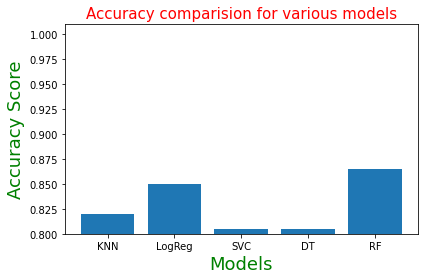

In [94]:
plt.bar(['KNN', 'LogReg', 'SVC', 'DT', 'RF'],accuracy_scores)
plt.ylim(0.80,1.01)
plt.title('Accuracy comparision for various models', fontsize=15, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('Accuracy Score', fontsize=18, color='g')
plt.tight_layout()
plt.show()